In [347]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [348]:
dfx=pd.read_csv('./Training_Data/Diabetes_XTrain.csv').values 
dfy=pd.read_csv('./Training_Data/Diabetes_YTrain.csv').values
dfx_test=pd.read_csv('./TestingData/Diabetes_Xtest.csv').values
dfx.shape

(576, 8)

In [349]:
#x_train=dfx[:500,]
#x_test=dfx[500:576,]
#x_test.shape

(array([0, 1]), array([375, 201]))


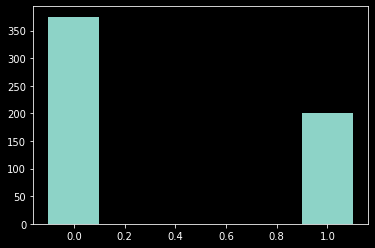

In [350]:
#y_train=dfy[:500,]
#y_test=dfy[500:576,].T[0]
x_train=dfx
x_test=dfx_test
y_train=dfy

to_plot=np.unique(y_train[:,0],return_counts=True)
print(to_plot)
plt.bar(to_plot[0],to_plot[1],width=0.2)
y_train=y_train.T[0]

In [351]:
def distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

#knn
def knn(x_train,y_train,query,k):
    dist=[]
    for i in range(x_train.shape[0]):
        distanc=distance(x_train[i],query)
        dist.append((distanc,y_train[i]))
    dist=sorted(dist)
    dist=dist[:k]
    dist=np.array(dist)
    #print(dist)
    total=np.unique(dist[:,1],return_counts=True)
    index=total[1].argmax()
    prediction=total[0][index]
    #print(total,index,prediction,sep='\n')
    return int(prediction)


In [352]:
print('\n\n\n\n\n')
count=0
y_pred=[]
for i in range(x_test.shape[0]):
    y=knn(x_train,y_train,x_test,23)
    y_pred.append(y)
    #if(int(y_test[i])-y_pred)!=0:
        #print(y_test[i],y_pred,sep='\t')
        #count+=1

#print(count)
np.savetxt('predicted_Test_class.csv',[y_pred],delimiter=',',fmt='%d')